# Описание
**Цель** — провести анализ анкет пользователей и подготовить план действий по удержанию клиентов сети фитнес-центров.  
А именно:
- спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:  
    1) выделить целевые группы клиентов;  
    2) предложить меры по снижению оттока;  
    3) определить другие особенности взаимодействия с клиентами

<details>    
<summary>Описание данных</summary>  
Информация содержат данные на месяц до оттока и факт оттока на определённый месяц.   
    
Набор данных включает следующие поля:  
    
- 'Churn' — факт оттока в текущем месяце;  
    
Текущие поля в датасете:  

Данные пользователя за предыдущий до проверки факта оттока месяц:
- 'gender' — пол
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
- 'Phone' — наличие контактного телефона
- 'Age' — возраст
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)  

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента  
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
- 'Group_visits' — факт посещения групповых занятий
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

</details>

**Содержание**  
1. [Исследовательский анализ данных (EDA)](#id-section1)
2. [Построение модели прогнозирования оттока пользователей](#id-section2)
3. [Кластеризация пользователей](#id-section3)
4. [Выводы и базовые рекомендации по работе с клиентами](#id-section4)

<div id='id-section1'/>

## 1. Исследовательский анализ данных (EDA)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
gym = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
gym

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [4]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
#приведем название столбцов к нижнему регистру
gym.columns = gym.columns.str.lower()

In [7]:
#Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался
gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


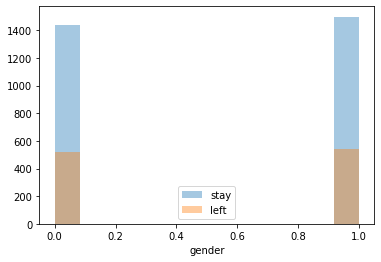

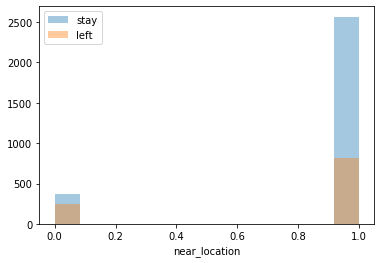

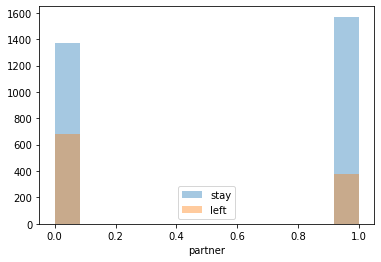

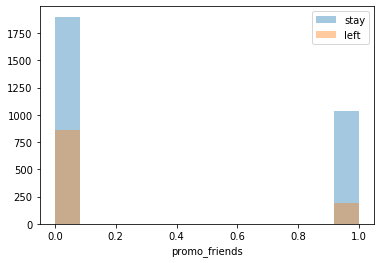

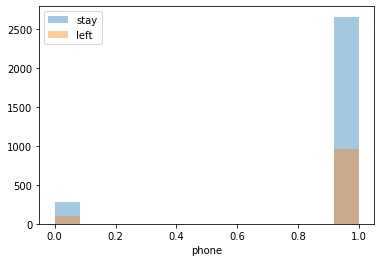

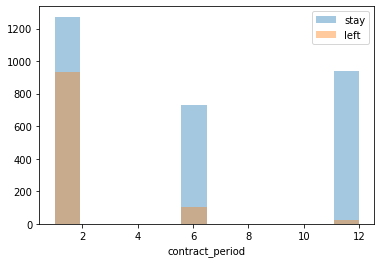

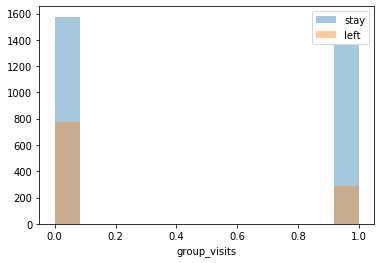

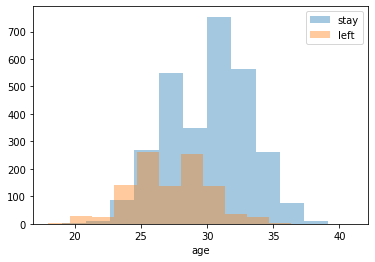

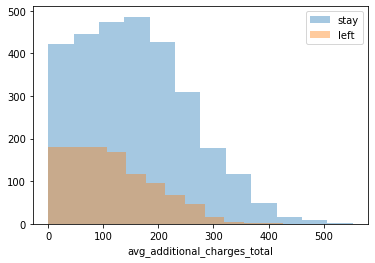

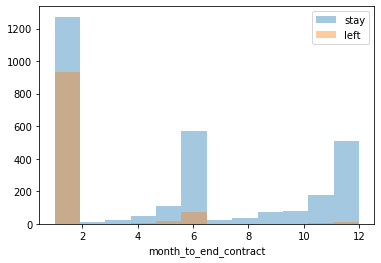

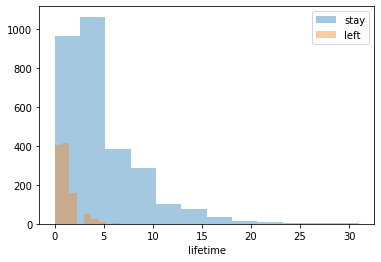

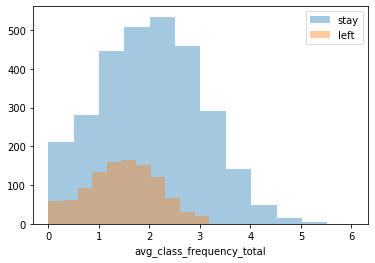

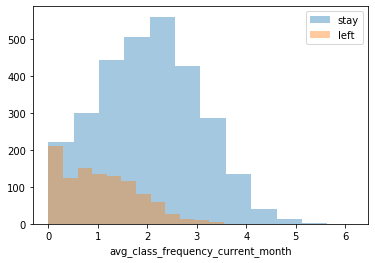

In [8]:
#Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
left = gym.query('churn == 1')
stay = gym.query('churn == 0')
for col in gym.drop('churn', axis = 1).columns:
    sns.distplot(stay[col], label = 'stay', bins=12, kde=False)
    sns.distplot(left[col], label = 'left', bins=12, kde=False)
    plt.legend()
    plt.show()

In [9]:
#Построим матрицу корреляций
cm = gym.corr()

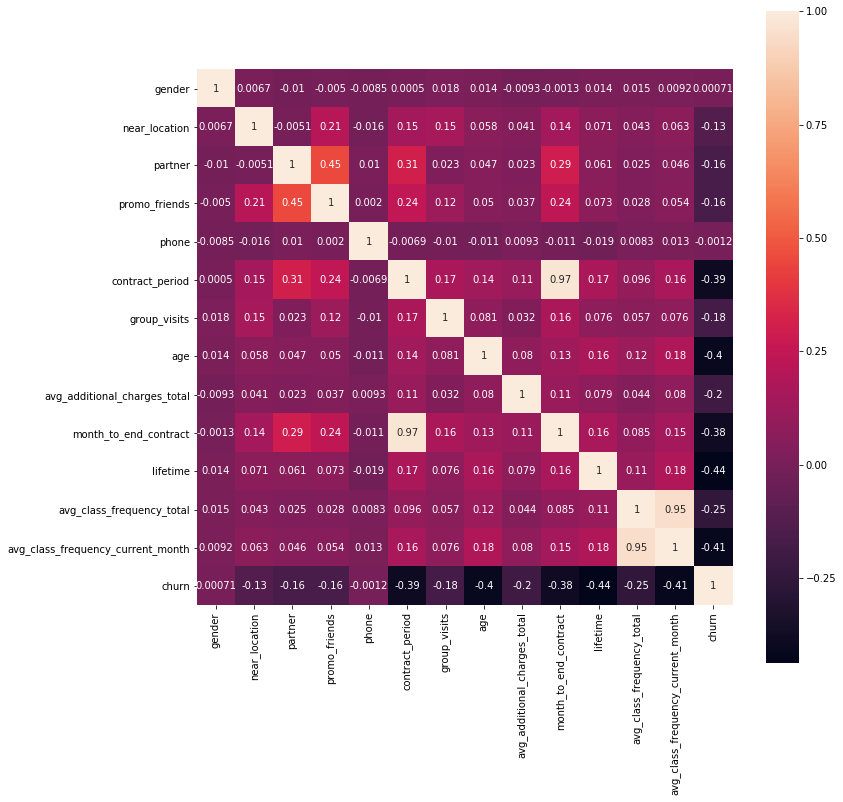

In [10]:
#нарисуем тепловую карту с подписями для матрицы корреляций
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cm, annot = True, square=True)


Предоставленный датасет с анкетами пользователей содержит 4 тысячи наблюдений. Целевая переменная - столбец с оттоком 'churn' и 13 признаков. Все признаки числовые. Категориальные признаки уже преоразованы в числовые. Все строки заполнены, пропущенных значений нет.  

Есть переменные, например, Age и Avg_additional_charges_total, с очень разным средним и очень разным по величине стандартным отклонением. Это говорит о том, что перед построением модели переменные нужно стандартизировать.  

Среди средних значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался — более всего выделяется 'Contract_period' — длительность текущего действующего абонемента и 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах). Среди тех, уто ушел в отток значение обоих признаков в несколько раз меньше, чем у тех, кто остался.

С целевой переменной 'churn' сильно коррелирующих признаков нет, но есть признаки, сильно коррелирующие между собой:  
- 'Contract_period' и 'Month_to_end_contract'
- 'Avg_class_frequency_total' и 'Avg_class_frequency_current_month'  
В случае использования линейных моделей взаимная корреляция нежелательна.

По предварительному анализу можем увидеть, что:
- зависимости от пола нет
- большинство клиентов живут или работают рядом с фитнес-центром
- среди сотрудников компании-партнёра клуба отток меньше.
- по акции "Приведи друга" приходит большая часть клиентов. Отток среди тех, кто пришел без акции, ниже в процентном соотношении от общего числа пришедших.
- отток минимален среди клиентов старше 30 лет и пользующихся клубом более 5-ти месяцев.
- больший отток среди тех, кто посещает клуб не больше 2-х раз в неделю
- больший отток среди тех, у кого остался месяц до конца срока действия абонемента.

Портрет среднестатистического клиента клуба:
- живет или работает рядом с фитнес-центром
- сотрудник компании-партнёра клуба
- покупает абонементы на длительный срок
- уже занимается в клубе несколько месяцев, в среднем 4-5 месяцев
- посещает занятия 2-3 раза в неделю
- пользуется дополнительными услугами
- старше 30 лет

<div id='id-section2'/>

## 2. Построение модели прогнозирования оттока пользователей

In [11]:
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = gym.drop('churn', axis = 1)
y = gym['churn']

In [12]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [13]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [14]:
# создадим объект класса StandardScaler и применим его к обучающей выборке 
scaler = StandardScaler() 

In [15]:
# обучаем scaler и одновременно трансформируем матрицу для обучающей выборки 
X_train_st = scaler.fit_transform(X_train) 

In [16]:
# применяем стандартизацию к матрице признаков для тестовой выборки 
X_test_st = scaler.transform(X_test)

In [17]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state = 0,  solver = 'lbfgs')

In [18]:
# обучим модель
lr_model.fit(X_train_st, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

In [20]:
# выведем все метрики
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85


In [21]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [22]:
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [23]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [24]:
# выведем все метрики
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83


Для прогнозирования оттока пользователей построили модель бинарной классификации пользователей двумя способами:
- модель логистической регрессии
- модель случайного леса.

Метрика accuracy (доля правильных ответов) 0,94 у логистической регресии и 0,92 у модели случайного леса. Это выскоий показатель, говорящий о том, что модели полезны. 
В данных оттока баланс 70% : 30%. Модель дает accuracy больше 0.7.  

Другие две метрики:
- precision (точность) - доля правильных ответов только среди целевого класса. 
- recall (полнота) показывает, сколько реальных объектов 1 класса мы смогли обнаружить с помощью модели. 

Точность и полнота на валидационной выборке выше у логистической регрессии. 
Precision: 0.90
Recall: 0.85

Так как для дальнейшей работы с клиентами нам важно выявить всех клиентов, которые собираются уйти, то наиболее важный показатель для нас Recall (полнота).

Поэтому для дальнейшего прогнозирования будем использовать модель логистической регрессии.

<div id='id-section3'/>

## 3. Кластеризация пользователей

In [25]:
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(X)

In [26]:
# передадим получившуюся стандартизированную таблицу в качестве параметра функции linkage()
linked = linkage(x_sc, method = 'ward')

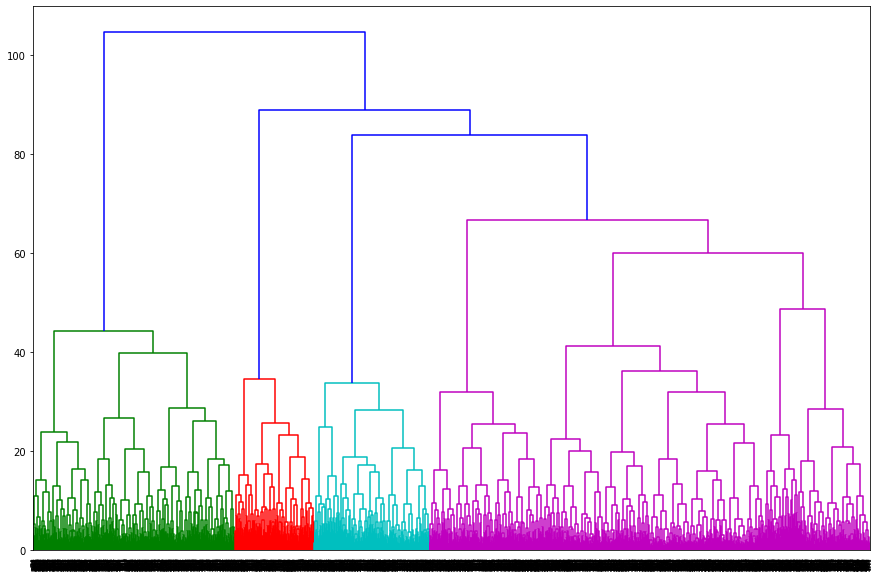

In [27]:
#построим дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

In [28]:
# задаём число кластеров, равное 5 
km = KMeans(n_clusters = 5, random_state = 0)

In [29]:
# прогнозируем кластеры для наблюдений 
labels = km.fit_predict(x_sc)

In [30]:
# сохраняем метки кластера в поле нашего датасета
gym['cluster_km'] = labels

In [31]:
# посмотрим на средние значения признаков для кластеров
gym.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


In [32]:
# отдельно посмотрим долю оттока для каждого кластера
gym.groupby('cluster_km')['churn'].mean()

cluster_km
0    0.027695
1    0.267532
2    0.443564
3    0.514263
4    0.068100
Name: churn, dtype: float64

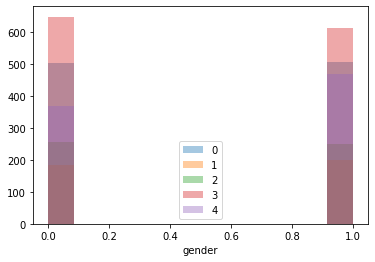

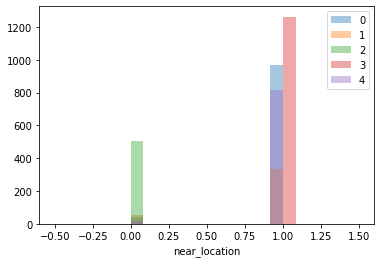

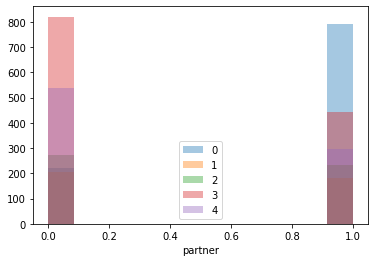

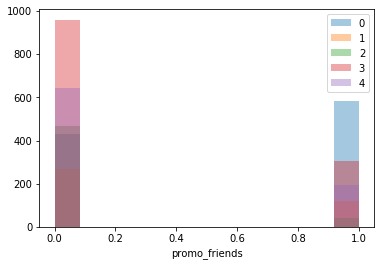

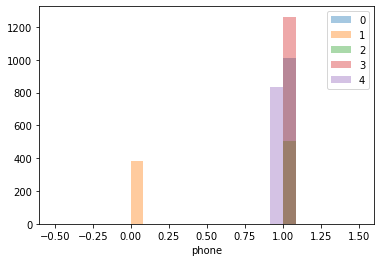

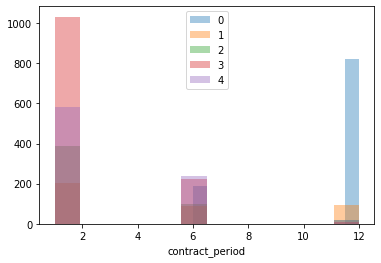

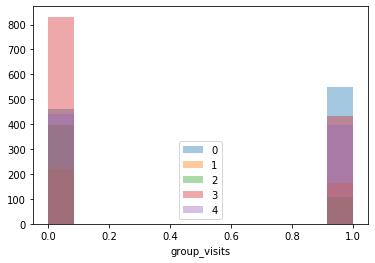

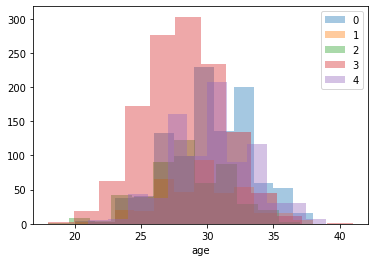

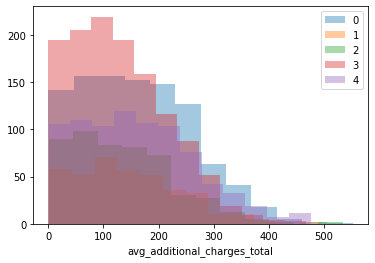

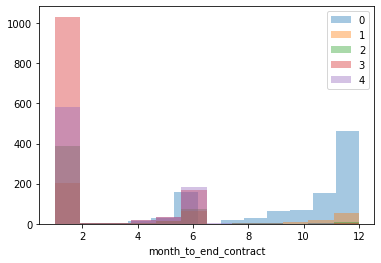

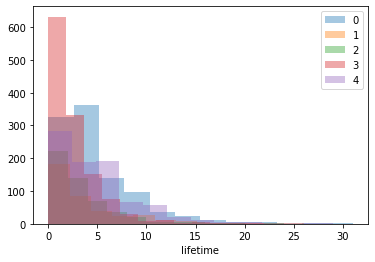

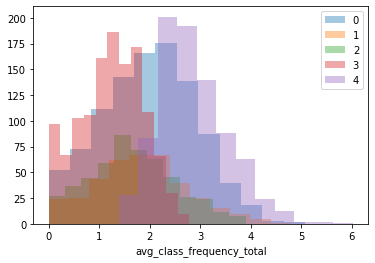

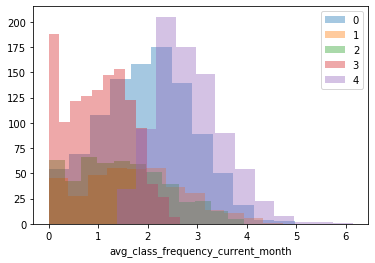

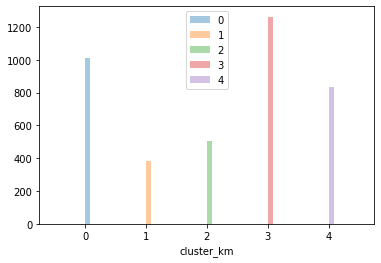

In [33]:
#Построим распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
for col in gym.drop('churn', axis = 1).columns:
    for i in range(5):
        cluster = gym.query('cluster_km == @i')
        sns.distplot(cluster[col], label = i, bins=12, kde=False)
        plt.legend()
    plt.show()

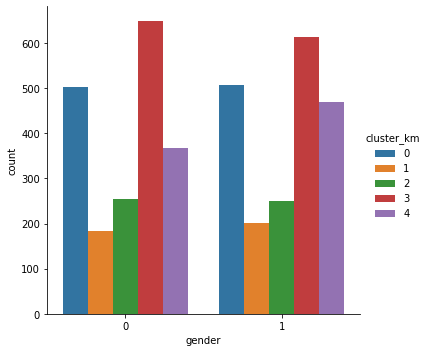

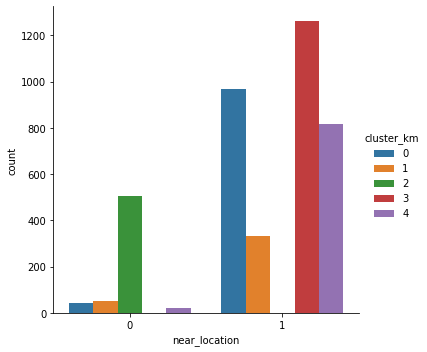

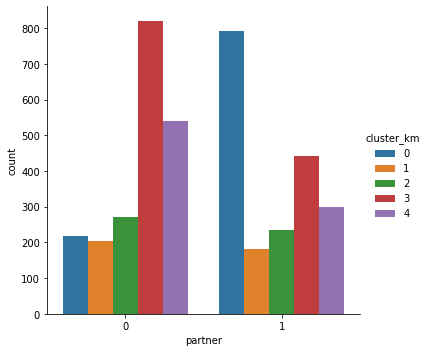

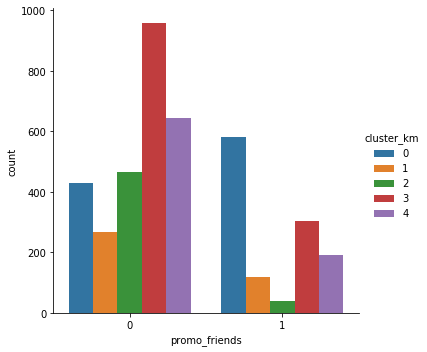

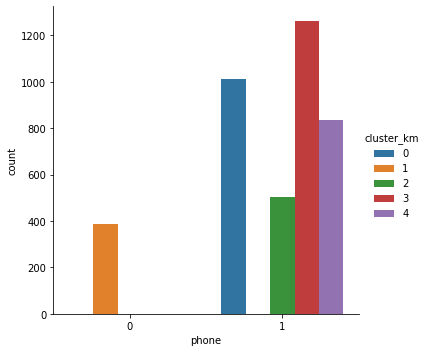

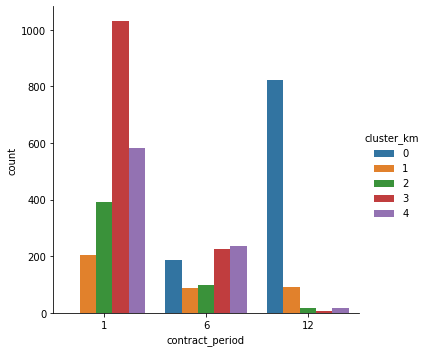

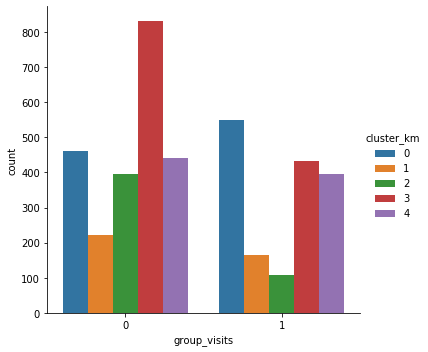

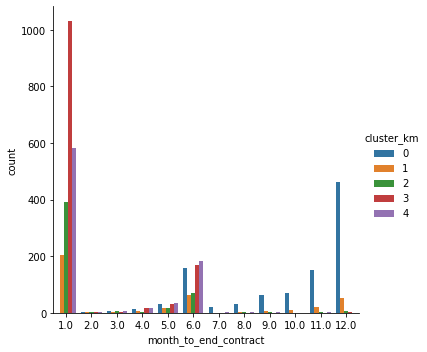

In [34]:
# построим столбчатые диаграммы для логических и дискретных переменных
for col in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'month_to_end_contract']:
    sns.catplot(x=col, kind='count',hue='cluster_km', data=gym, orient="h")

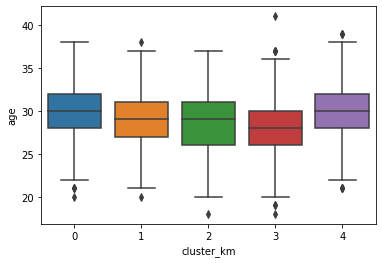

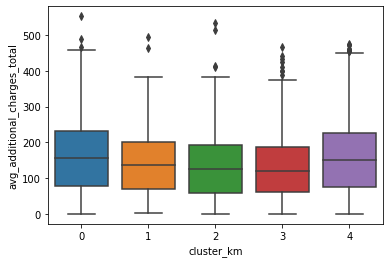

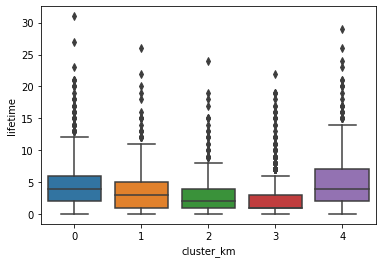

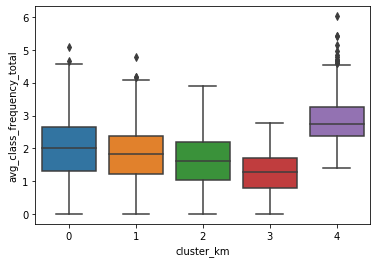

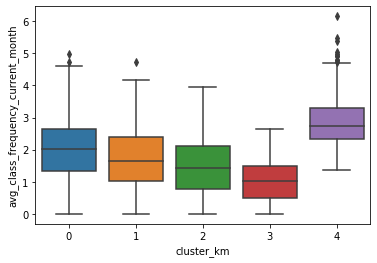

In [35]:
# построим боксплоты для непрерывных переменных
for col in ['age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    sns.boxplot(x='cluster_km', y=col, data=gym)
    plt.show()

По дендрограмме можно было выделить 4 класса.
Мы выделили 5 классов.
Не склонны к оттоку классы 0 и 4. В классах 2 и 3 около половины пользователей уходит в отток. При этом в классе 3 наиболейшее количество пользователей. В класс 1 попали пользователи, которые не оставляют своей телефон для связи. Но доля оттока там ниже, чем в классе 2 и 3.

Для пользователей, несклонных к оттоку, характерно: 
- живет или работает рядом с фитнес-центром
- оставлют контактный телефон
- пользуется другими услугами фитнес-центра
- уже ходят в фитнес-центр в среднем 4-5 месяцев
- занимаются 2-3 раза в неделю
- многие из них покупают абонементы на год

Признаки склонных к оттоку пользователей:
- живут или работают в другом районе
- не покупают длительные абонементы, чаще всего покупают на 1 или 3 месяца
- многие из них не посещают групповые занятия
- большинство моложе 30 лет
- чаще всего ходят на фитнес 0-2 раза в неделю
- доп.услугами фитнес центра пользуются минимально или не пользуются
- lifetime чаще всего 1 месяц, как правило не более полугода

<div id='id-section4'/>

## 4. Выводы и базовые рекомендации по работе с клиентами

**EDA**

Проанализировали датасет с четырьми тысячами анкетами пользователей. Целевая переменная - столбец с оттоком 'churn' и 13 числовых признаков. Все строки заполнены, пропущенных значений нет.  

Так как есть переменные, например, Age и Avg_additional_charges_total, с очень разным средним и очень разным по величине стандартным отклонением, применили стандартизацию.

Среди средних значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался — более всего выделяется 'Contract_period' — длительность текущего действующего абонемента и 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах). Среди тех, уто ушел в отток значение обоих признаков в несколько раз меньше, чем у тех, кто остался.

С целевой переменной 'churn' сильно коррелирующих признаков нет, но есть признаки, сильно коррелирующие между собой:  
- 'Contract_period' и 'Month_to_end_contract'
- 'Avg_class_frequency_total' и 'Avg_class_frequency_current_month'  
В данном анализе это роли не сыграло, но в случае использования линейных моделей взаимная корреляция нежелательна.

Основные выводу по предоставленным данным:
- зависимости от пола нет
- большинство клиентов живут или работают рядом с фитнес-центром
- среди сотрудников компании-партнёра клуба отток меньше.
- по акции "Приведи друга" приходит большая часть клиентов. Отток среди тех, кто пришел без акции, ниже в процентном соотношении от общего числа пришедших.
- отток минимален среди клиентов старше 30 лет и пользующихся клубом более 5-ти месяцев.
- больший отток среди тех, кто посещает клуб не больше 2-х раз в неделю
- больший отток среди тех, у кого остался месяц до конца срока действия абонемента.

**Модель прогнозирования оттока**

Для прогнозирования оттока пользователей построили модель бинарной классификации пользователей двумя способами:
- модель логистической регрессии
- модель случайного леса.

Проанализировали метрики:
- accuracy - доля правильных ответов
- precision (точность) - доля правильных ответов только среди целевого класса. 
- recall (полнота) показывает, сколько реальных объектов 1 класса мы смогли обнаружить с помощью модели. 

На валидационной выборке все метрики выше у логистической регрессии. 
Accuracy: 0.94
Precision: 0.85
Recall: 0.83

Так как нам важно выявить всех клиентов, которые собираются уйти для дальнейшей работы с ними, то наиболее важный показатель для нас recall (полнота).

Поэтому для дальнейшего прогнозирования будем использовать модель логистической регрессии.

**Кластеризация пользователей**

Мы выделили 5 классов. Хотя по дендрограмме можно было выделить и 4 класса. Именно в 4-х из них есть явные различия по оттоку.  
Не склонны к оттоку классы 0 и 4. В классах 2 и 3 около половины пользователей уходит в отток. При этом в классе 3 наиболейшее количество пользователей. В класс 1 попали пользователи, которые не оставляют своей телефон для связи. Но доля оттока там ниже, чем в классе 2 и 3. 

Для пользователей, несклонных к оттоку, характерно: 
- живет или работает рядом с фитнес-центром
- оставлют контактный телефон
- пользуется другими услугами фитнес-центра
- уже ходят в фитнес-центр в среднем 4-5 месяцев
- занимаются 2-3 раза в неделю
- многие из них покупают абонементы на год

Признаки склонных к оттоку пользователей:
- живут или работают в другом районе
- не покупают длительные абонементы, чаще всего покупают на 1 или 3 месяца
- многие из них не посещают групповые занятия
- большинство моложе 30 лет
- чаще всего ходят на фитнес 0-2 раза в неделю
- доп.услугами фитнес центра пользуются минимально или не пользуются
- lifetime чаще всего 1 месяц, как правило не более полугода

**Рекомендации**

- Так как в отток чаще попадают люди, решившие вести здоровый образ жизни "с понедельника" (lifetime до 1 месяца) рекомендуем приобретать длительные абонементы, чтобы закрепить привычку заниматься спортом. Можно делать скидки и акции на покупку абонементов на 6 и 12 месяцев для новых клиентов.
- Новичков стимулировать не пропускать занятия,заниматься регулярно 2-3 раза в неделю. Акция для новеньких при регулярных занятиях. Например, фитнес-батончики, свежевыжатые соки и т.п. Или как бонус можно предлагать другие услуги.
- Уделять больше внимания со стороны персонала и тренеров тем, кто только знакомится с фитнес-центром, индивидуальный подход. Ненавязчиво узнавать причины пропуска тренировок у таких клиентов, предлагать варианты решения.
- Анкета обратной связи до окончания срока действия абонемента тем клиентам, которые по прогнозу уйдут в отток. Узнаем, насколько комфортно им и удобно, что не подходит. 